In SLR, there is only one variable x, where the relationship between x and y is represented by the equation:

$$y_i = m\cdot{x} + b$$

In [31]:
from collections import Counter
from functools import partial, reduce
import math, random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [32]:
url_base = 'https://raw.githubusercontent.com/frosty110/' \
           'Book_Projects/master/Data%20Science/Algorithm%20Practice/' 
fileName = 'swim100m.csv'
url = url_base + fileName
print(url)


https://raw.githubusercontent.com/frosty110/Book_Projects/master/Data%20Science/Algorithm%20Practice/swim100m.csv


In [33]:
data = pd.read_csv(urlopen(url))

Eyeball some of the data. We'll look at the first 3 columns.

Since we have a lot of data, the boxplot and describes allow us to get a general idea of our data and what the parameters represent numerically.

Do a describe to get a better understanding of the data.

In [113]:
maleDf.describe()

,year,time
count,31.000000,31.000000
mean,1953.612903,54.656129
std,29.205796,5.208095
min,1905.000000,47.840000
25%,1929.000000,50.015000
50%,1957.000000,54.600000
75%,1975.500000,57.100000
max,2000.000000,65.800000


In [116]:
femaleDf.describe()

,year,time
count,31.000000,31.000000
mean,1950.677419,65.192258
std,30.146738,10.745974
min,1908.000000,53.520000
25%,1925.000000,56.305000
50%,1956.000000,62.000000
75%,1975.000000,71.100000
max,2004.000000,95.000000


For the year column, let's do some more plotting.

In [118]:
# yearCol = data['year']
# timeCol = data['time']

[]

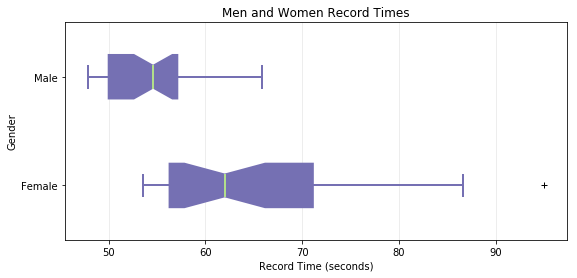

In [133]:
fig, ax1 = plt.subplots(figsize=(9,4))
# ax.grid(True)

ax1.xaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax1.set_axisbelow(True)
ax1.set_ylabel('Gender')
ax1.set_xlabel('Record Time (seconds)')
ax1.set_title('Men and Women Record Times')

labels = ['Female', 'Male']
bp = plt.boxplot(
    [femaleDf['time'], maleDf['time']],
    labels=labels,
    vert = False,
    widths=.4,
    patch_artist=True,  # fill with color
    notch = True        # shape of box
)

plt.setp(bp['whiskers'], color='#7570b3', linewidth=2)
plt.setp(bp['medians'], color='#b2df8a', linewidth=2)
plt.setp(bp['boxes'], color='#7570b3', linewidth=2)
plt.setp(bp['caps'], color='#7570b3', linewidth=2)
plt.setp(bp['fliers'], color='red', marker='+', linewidth=2)

plt.plot()

Since we have a lot of data, the boxplot and describes allow us to get a general idea of our data and what the parameters represent numerically.

Now we'll look at a scatter plot to observe a relationship between the two paramters, age and time for swimming the 100m.

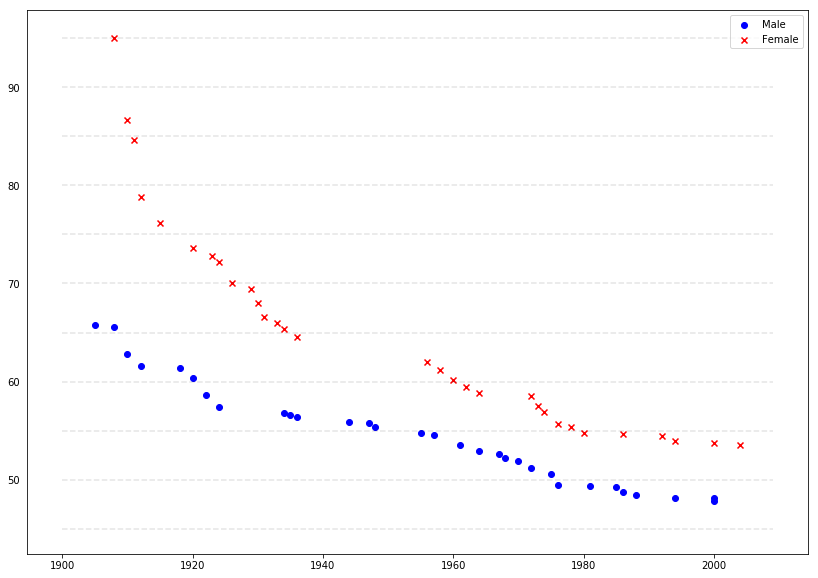

In [ ]:
import plotly.plotly as py 
import plotly.tools as tls   
from plotly.graph_objs import *

fig, ax = plt.subplots(figsize=(14,10))

ax.spines["top"].set_visible(False)        
ax.spines["right"].set_visible(False) 

plt.ylim(45, 100)    
plt.xlim(1900, 2010)  

plt.yticks(range(45, 100, 5), [str(x) + "m" for x in range(45, 100, 5)], fontsize=14)    
plt.xticks(range(1900, 2010, 15), [str(x) + "" for x in range(1900, 2010, 15)], fontsize=14)  

for y in range(45, 100, 5):    
    plt.plot(range(1900, 2010), [y] * len(range(1900, 2010)), "--", lw=1.5, color="black", alpha=0.1) 
plt.tick_params(axis="both", which="both", bottom=True, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True) 
plt.scatter(maleDf['year'],maleDf['time'], c='b', label='Male', marker='o')
plt.scatter(femaleDf['year'],femaleDf['time'], c='r', label='Female', marker='x')
plt.legend()
plt.show()